## 46 - Satellite Data with CLASS Part 3

[Youtube](https://www.youtube.com/watch?v=wtplqUxlu4Q)

[NOAA CLASS](https://www.avl.class.noaa.gov/saa/products/welcome)

Make sure: User preferences > GVAR Data Extraction Preferences > GVAR_IMG > NetCDF  &nbsp; (Metpy Monday #44)

How to download files &nbsp; (Metpy Monday #45) <br/>
Quick summary: <br/>

Search Data > Environmental Data from Geostationary Satellites > GOES Satellite Data - Imager (GVAR_IMG) <br/>
Set options:
- Start Date: 27 April 2011 19:00:00 
- End Date: 27 April 2011 20:59:59 
- Coverage: Continental United States
- Satellite Schedule: Routine, Rapid Scan Operation
- Satellite: GOES-13

... or ... <br/>

[File directory](https://download.avl.class.noaa.gov/download/8369075216/001)

file names: 
- goes13.2011.117.200229.BAND_01.nc
- goes13.2011.117.200229.BAND_02.nc
- goes13.2011.117.200229.BAND_03.nc
- goes13.2011.117.200229.BAND_04.nc
- goes13.2011.117.200229.BAND_06.nc

In [1]:
from netCDF4 import Dataset

In [2]:
file = 'satellite_data/goes13.2011.117.200229.BAND_01.nc'

In [3]:
ds = Dataset(file, 'r')

In [4]:
list(ds.variables)

['version',
 'sensorID',
 'imageDate',
 'imageTime',
 'startLine',
 'startElem',
 'time',
 'dataWidth',
 'lineRes',
 'elemRes',
 'prefixSize',
 'crDate',
 'crTime',
 'bands',
 'auditTrail',
 'data',
 'lat',
 'lon']

In [5]:
ds.variables['data']

<class 'netCDF4._netCDF4.Variable'>
float32 data(time, yc, xc)
    long_name: Raw Satellite Counts
    type: GVAR
    coordinates: lon lat
unlimited dimensions: 
current shape = (1, 3459, 8504)
filling on, default _FillValue of 9.969209968386869e+36 used

In [6]:
vis_16bit = ds.variables['data'][0]
vis_16bit.max()

25056.0

In [7]:
vis_10bit = vis_16bit/32
vis_10bit.max()

783.0

In [8]:
ds.variables['lat'][:]

masked_array(
  data=[[2.14328934e+09, 2.14328934e+09, 2.14328934e+09, ...,
         6.11567688e+01, 6.11581802e+01, 6.11595955e+01],
        [2.14328934e+09, 2.14328934e+09, 2.14328934e+09, ...,
         6.11267357e+01, 6.11281433e+01, 6.11295509e+01],
        [2.14328934e+09, 2.14328934e+09, 2.14328934e+09, ...,
         6.10967560e+01, 6.10981598e+01, 6.10995598e+01],
        ...,
        [1.46933889e+01, 1.46931944e+01, 1.46930008e+01, ...,
         1.42736044e+01, 1.42736597e+01, 1.42737150e+01],
        [1.46834927e+01, 1.46832991e+01, 1.46831055e+01, ...,
         1.42640409e+01, 1.42640953e+01, 1.42641506e+01],
        [1.46735973e+01, 1.46734037e+01, 1.46732101e+01, ...,
         1.42544775e+01, 1.42545328e+01, 1.42545872e+01]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [9]:
import numpy as np

In [10]:
lon = np.ma.masked_values(ds.variables['lon'], 2.14329e+09)
lat = np.ma.masked_values(ds.variables['lat'], 2.14329e+09)

In [11]:
print(lon)

[[-- -- -- ... -45.09507751464844 -45.079463958740234 -45.0638427734375]
 [-- -- -- ... -45.129371643066406 -45.11378479003906 -45.09819412231445]
 [-- -- -- ... -45.16351318359375 -45.14795684814453 -45.13239288330078]
 ...
 [-111.13580322265625 -111.1283187866211 -111.12083435058594 ...
  -61.95934295654297 -61.95377731323242 -61.94820785522461]
 [-111.13345336914062 -111.12596130371094 -111.11847686767578 ...
  -61.960018157958984 -61.95445251464844 -61.948883056640625]
 [-111.131103515625 -111.12361145019531 -111.11612701416016 ...
  -61.960693359375 -61.95512771606445 -61.94955825805664]]


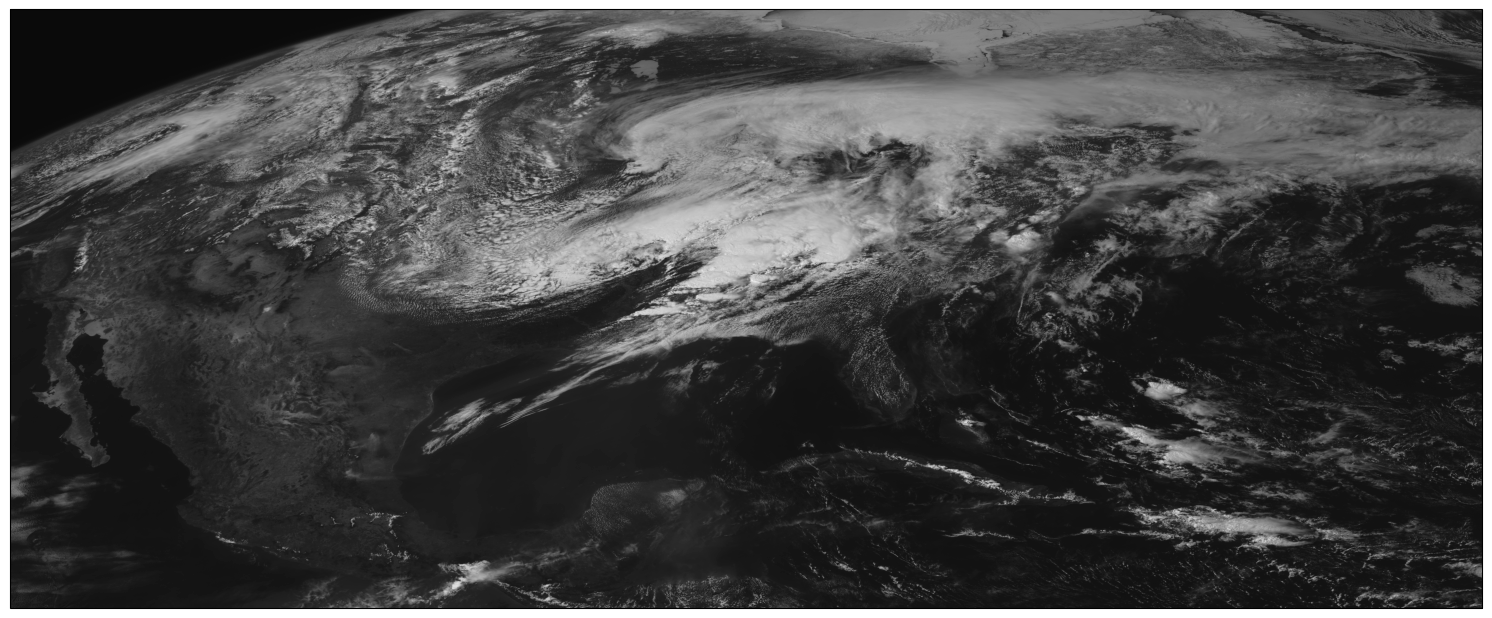

In [12]:
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

mapcrs = ccrs.Geostationary(central_longitude = -75)

fig = plt.figure(1, figsize = (19, 10))
ax = plt.subplot(111, projection = mapcrs)
img = ax.imshow(vis_10bit, cmap = 'Greys_r', origin = 'upper')